<a href="https://colab.research.google.com/github/boriskuchin/MADMO-BASE-2024/blob/main/11_dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Понижение размерности

**Понижение размерности** (англ. dimensionality reduction) - уменьшение числа признаков набора данных.

Зачем?

- Количество признаков напрямую сказывается на скорости обучения
- Неинформативные признаки “зашумляют” данные, делая модель излишне сложной
- Визуализация
- Мультиколлинеарность

# Principal Component Analysis

Метод главных компонент, PCA.

**Основная идея** - найти такое подпространство меньшей размерности, чтобы квадратичные ошибки спроектированных данных были минимальны.

Эта задача аналогична максимизации расстояния проекций точек до начала координат, а это по сути ни чть иное как максимизация дисперсии (ковариации) данных в этом подпространстве!

![](https://matthew-brett.github.io/teaching/_images/pca_introduction-14.png)

[[ 1.          2.4849446 ]
 [ 2.          2.85648482]
 [ 3.          4.5352959 ]
 [ 4.          9.48017993]
 [ 5.         12.62192033]
 [ 6.         14.09355165]
 [ 7.         11.49985806]
 [ 8.         16.71451376]
 [ 9.         15.33304151]
 [10.         21.10282256]]


<Axes: >

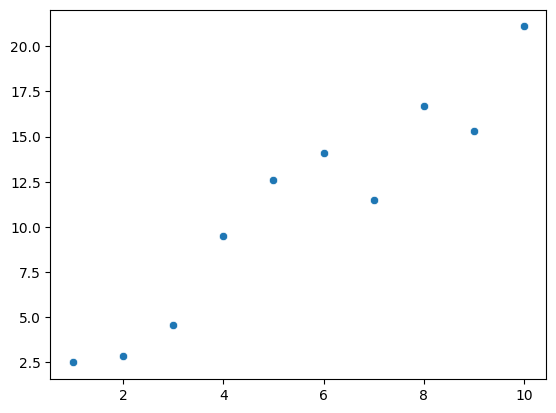

In [ ]:
import numpy as np
import seaborn as sns

x = np.arange(1,11)
y = 2 * x + np.random.randn(10)*2
X = np.vstack((x,y)).T
print(X)
sns.scatterplot(x=X[:,0], y=X[:,1])

>**Важный момент!**
>
>Раз мы ищем дисперсии / ковариации, то для более честного подсчета данные необходимо стандартизировать!

<Axes: >

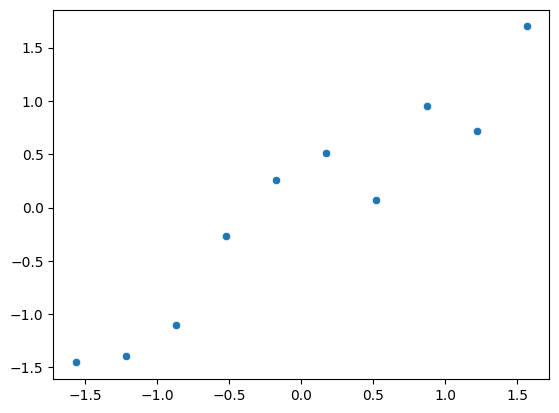

In [ ]:
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)
sns.scatterplot(x=X_norm[:,0], y=X_norm[:,1])

Ковариация - мера линейной зависимости случайный величин:

$$ Cov(X, Y) = \mathbb{E}[(X-\mathbb{E}X)(Y-\mathbb{E}Y)] $$

- Т.к. данные у нас многомерные, то и ковариация будет не числом, а матрицей.
- Т.к. данные мы отнормировали, то $\mathbb{E}(X_i)=\mathbb{E}(X_j)=0$, $Cov(X_i, X_i) = Var(X_i) = 1 $, $Cov(X_i, X_j) = \mathbb{E}(X_i X_j)$

In [ ]:
covmat = np.cov(X_norm, rowvar=False, bias=True)
covmat

array([[1.        , 0.95296891],
       [0.95296891, 1.        ]])

Направление максимальной дисперсии у проекции совпадает с собственным вектором матрицы ковариации (eigenvector).

Величина дисперсии определяется собственным значением матрицы ковариации (eigenvalue)

Это выводится с помощью соотношения Релея ([хороший материал по выводу](https://habr.com/ru/articles/304214/)).


Найдем собственные значения и векторы:

In [ ]:
values, vecs = np.linalg.eig(covmat)

In [ ]:
vecs

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [ ]:
values

array([1.95296891, 0.04703109])

In [ ]:
k = 1
order = np.argsort(values)[::-1][:k]
order

array([0])

Сформируем матрицу проекции:

In [ ]:
proj_mat = vecs[:, order]
proj_mat

array([[0.70710678],
       [0.70710678]])

Проецируем:

In [ ]:
X_new = X_norm @ proj_mat
X_new

array([[-2.1359364 ],
       [-1.84527092],
       [-1.39809296],
       [-0.55988576],
       [ 0.0624408 ],
       [ 0.48481424],
       [ 0.42046832],
       [ 1.29097382],
       [ 1.3717606 ],
       [ 2.30872826]])

Сравним с sklearn:

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 1)
X_new_sk = pca.fit_transform(X_norm)

In [ ]:
X_new_sk

array([[-2.1359364 ],
       [-1.84527092],
       [-1.39809296],
       [-0.55988576],
       [ 0.0624408 ],
       [ 0.48481424],
       [ 0.42046832],
       [ 1.29097382],
       [ 1.3717606 ],
       [ 2.30872826]])

## Потерянная информация


Как понять сколько информации (дисперсии) мы потеряли с помощью понижения размерности? Как понять сколько компонент использовать?

В этом поможет график explained variance - берем дисперсии по каждой из осей и делим на общую сумму дисперсий по осям (т.е. сумму всех собственных чисел ковариационной матрицы).



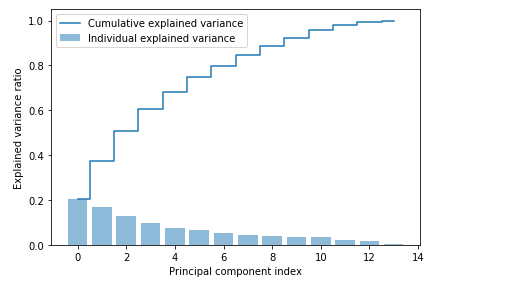

In [ ]:
pca.explained_variance_ratio_

array([0.97648446])

С помощью одной компоненты отлично передали разнообразие данных!

Преимущества PCA:
- простой
- линейный
- интерпретируемый
- переносимый

## Применение PCA

[Eigenfaces](https://towardsdatascience.com/eigenfaces-recovering-humans-from-ghosts-17606c328184) - применение PCA для распознавания лиц.

"Среднее" лицо:

![](https://miro.medium.com/v2/resize:fit:640/format:webp/1*PXMHYZGRAv8qgjfOdxqSwQ.png)

Основные 16 компонент:

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*U14Aw-_f3esZh0tMpz3p5A.png)

Пример разложения:

![](https://media.geeksforgeeks.org/wp-content/uploads/20200317134836/train_faces.png)

## Практика

Рассмотрим на примере датасета Iris:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_iris

data = load_iris()

In [ ]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
y = data.target
X = pd.DataFrame(data.data, columns=data.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


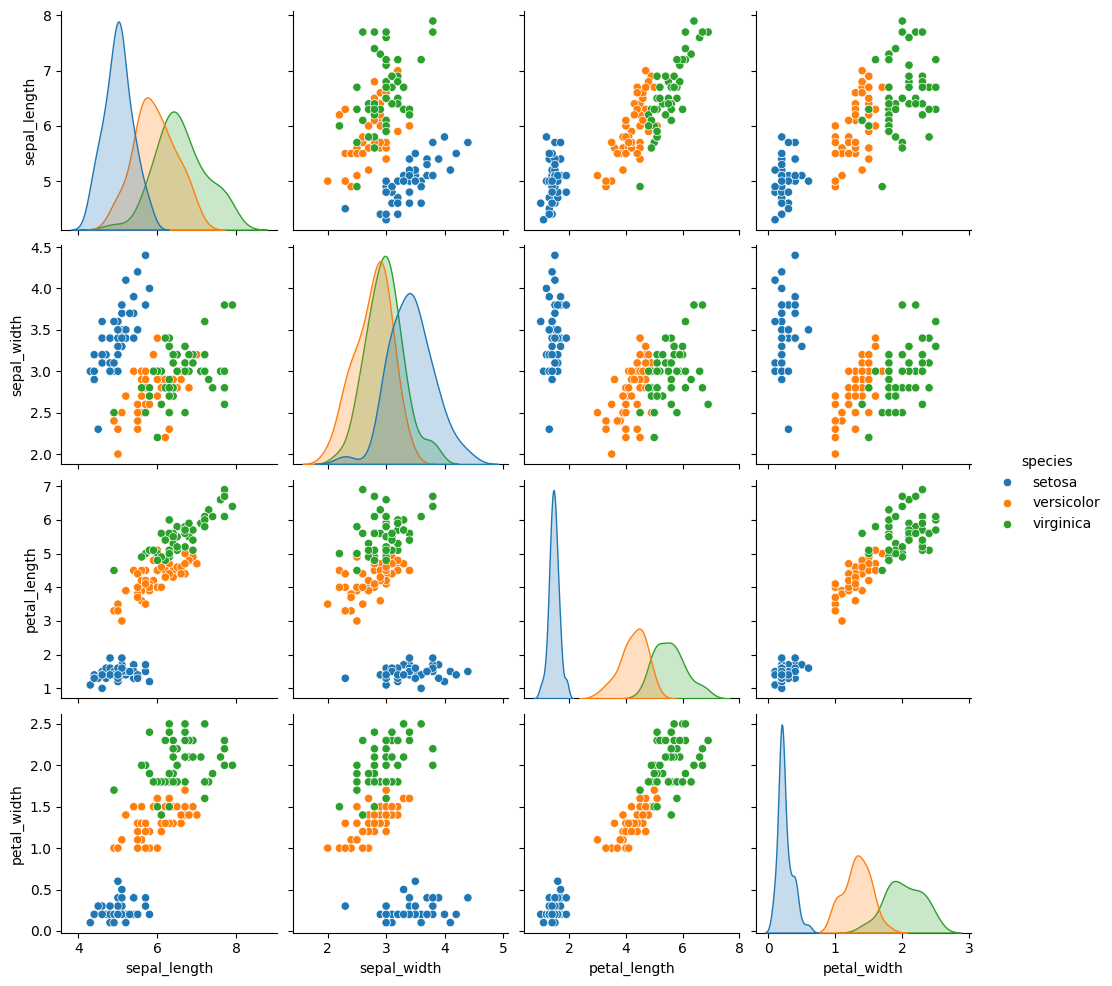

In [ ]:
import seaborn as sns

penguins = sns.load_dataset("iris")
sns.pairplot(penguins, hue="species")

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
X = X.values

### Реализация на Sklearn

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=3)
pca.fit(X)

PCA(n_components=3)

In [ ]:
Z = pca.transform(X)

In [ ]:
Z.shape

(150, 3)

Отобразим результат проекции

Text(0.5, 0, 'PC3')

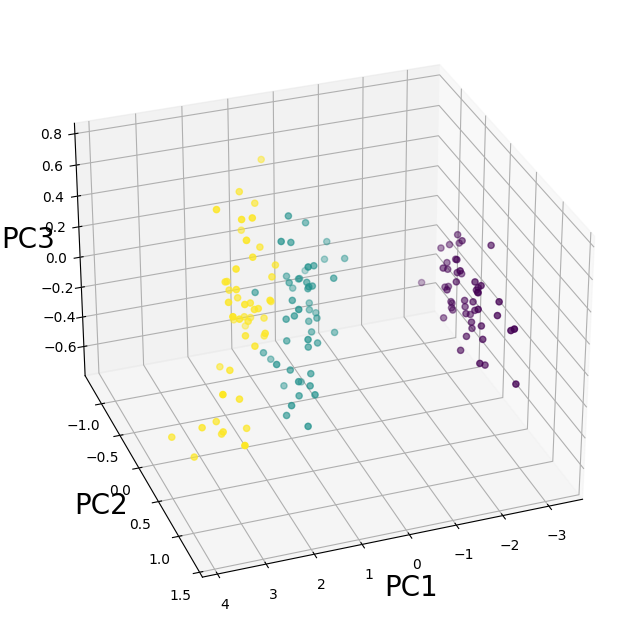

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 70)
ax.scatter(Z.T[0], Z.T[1], Z.T[2], c=y)
ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
ax.set_zlabel('PC3', fontsize=20)

In [ ]:
# Отобразим коэффициенты перехода
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143]])

In [ ]:
# отображаем 4 мерное исходное в 3х мерное
pca.components_.shape

(3, 4)

In [ ]:
# проверка - домножим Х на коэфф, будем отображать по 5 элементов
X.dot(pca.components_.T)[:5]

array([[ 2.81823951,  5.64634982, -0.65976754],
       [ 2.78822345,  5.14995135, -0.84231699],
       [ 2.61337456,  5.18200315, -0.61395246],
       [ 2.75702228,  5.0086536 , -0.60029334],
       [ 2.7736486 ,  5.65370709, -0.54177348]])

In [ ]:
# результат не сходится из-за отсутствия центрирования, которое библиотека делает по умолчанию
Z[:5]

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924]])

In [ ]:
# центрируем
X_mean = X - X.mean(axis=0)
# после центрирования результат сходится
X_mean.dot(pca.components_.T)[:5]

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924]])

In [ ]:
# дисперсия вдоль каждой компоненты
pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 ])

In [ ]:
# доля объясненной дисперсии
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

<BarContainer object of 3 artists>

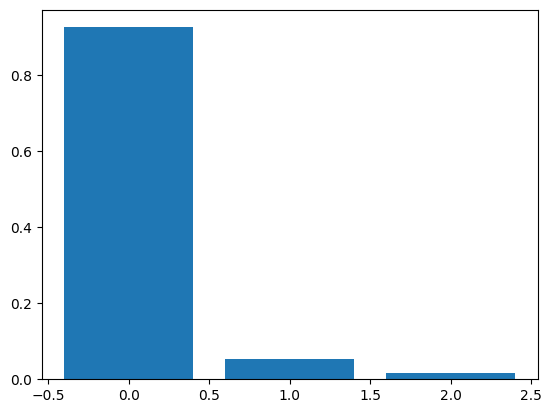

In [ ]:
plt.bar(height=pca.explained_variance_ratio_ , x=[0, 1, 2])

### Через сингулярное разложение

Попробуем по-другому - через сингулярное разложение:

In [ ]:
# будем сразу подавать центрированную
# проведем полное сингулярное разложение
U, D, Vt = np.linalg.svd(X_mean, full_matrices=0) # 2й атрибут для корректных размеров Vt = (. , N, M) и U = (. ,M, M)

In [ ]:
# проверим размерности, что выполнено полное сингулярное разложение
print(U.shape)
print(D.shape)
print(Vt.shape) # размерности ок

(150, 4)
(4,)
(4, 4)


In [ ]:
# в полном сингулярном разложении матрицы полностью восстанавливаются, отобразим 5 значений
# центральная - вектор, так что конвертируем в диагональную
print(U.dot(np.diag(D)).dot(Vt)[:5])

[[-0.74333333  0.44266667 -2.358      -0.99933333]
 [-0.94333333 -0.05733333 -2.358      -0.99933333]
 [-1.14333333  0.14266667 -2.458      -0.99933333]
 [-1.24333333  0.04266667 -2.258      -0.99933333]
 [-0.84333333  0.54266667 -2.358      -0.99933333]]


In [ ]:
# сравниваем с центрированной - все ок
X_mean[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333


In [ ]:
# на всякий случай MSE по каждому компоненту
((U.dot(np.diag(D)).dot(Vt) - X_mean)**2).sum() # получается очнь маленькое число

7.232168195690805e-29

In [ ]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143]])

In [ ]:
Vt # элементы те же, но с разными знаками (особенность алгоритма) если в сингулярном строку U и столбец V домножить на -1, то получится тот же результат

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [-0.65658877, -0.73016143,  0.17337266,  0.07548102],
       [ 0.58202985, -0.59791083, -0.07623608, -0.54583143],
       [ 0.31548719, -0.3197231 , -0.47983899,  0.75365743]])

In [ ]:
Z_SVD = X_mean.dot(Vt[:3].T) # возьмем компоненты Vt полученные из SVD и домножим на центрированную

In [ ]:
# сравним результат от сингулярного на 3х с Sklearn
Z_SVD[:5]

array([[-2.68412563, -0.31939725,  0.02791483],
       [-2.71414169,  0.17700123,  0.21046427],
       [-2.88899057,  0.14494943, -0.01790026],
       [-2.74534286,  0.31829898, -0.03155937],
       [-2.72871654, -0.32675451, -0.09007924]])

In [ ]:
# результаты совпадают с точностью до знака
Z[:5]

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924]])

### Через матрицу ковариации

In [ ]:
# Находим матрицу ковариации
C = X_mean.T.dot(X_mean)

In [ ]:
# находим собственные вектора и собственные числа матрицы ковариации
lambd, w = np.linalg.eig(C)

In [ ]:
lambd # собственные числа матрицы ковариации

array([630.0080142 ,  36.15794144,  11.65321551,   3.55142885])

In [ ]:
w # собственные вектора матрицы ковариации

array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
       [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
       [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
       [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]])

In [ ]:
# сравним с результатами из сингулярного разложения
Vt.T # совпадает

array([[ 0.36138659, -0.65658877,  0.58202985,  0.31548719],
       [-0.08452251, -0.73016143, -0.59791083, -0.3197231 ],
       [ 0.85667061,  0.17337266, -0.07623608, -0.47983899],
       [ 0.3582892 ,  0.07548102, -0.54583143,  0.75365743]])

In [ ]:
# доля объясненной дисперсии
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

In [ ]:
lambd/lambd.sum() # совпадают (тут все собственные)

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

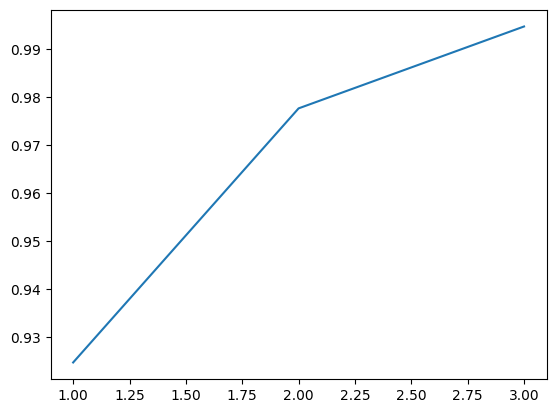

In [ ]:
# признаки очень чувствительны к масштабу, что видно по графику - одна компонента объясняет 98%!
# так что вместо центрирования лучше использовать стандартизацию, так вклад масштаба каждого признака будет одинаков

plt.plot([1,2,3], np.cumsum(pca.explained_variance_ratio_))

### Влияние метода PCA на качество

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
# центрируем признаки и применяем KNN
model = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier())
])

In [ ]:
# используем кросс-валидацию на 10 фолдах с перемешкой
cv = StratifiedKFold(shuffle=True, n_splits=10)

In [ ]:
# смотрим среднюю долю верно угаданных ответов
cross_val_score(model, X, y, scoring='accuracy', cv=cv).mean()

0.9533333333333335

In [ ]:
# как меняется качество с разным количством компонент
for n in range(1, 5):
    # с методом главных компонент
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n)),
        ('clf', KNeighborsClassifier())
    ])
    print(f'Кол-во компонент {n}, Средняя accuracy =', cross_val_score(model, X, y, scoring='accuracy', cv=cv).mean())

# видно, что качество падает не сильно при уменьшении количества компонент

Кол-во компонент 1, Средняя accuracy = 0.9066666666666668
Кол-во компонент 2, Средняя accuracy = 0.9200000000000002
Кол-во компонент 3, Средняя accuracy = 0.9400000000000001
Кол-во компонент 4, Средняя accuracy = 0.9466666666666667


# SNE & t-SNE

Линейные операции - слишком просто, хотим нелинейно! Но нелинейно сложно - хотелось бы иметь явную зависимость...

А можем без явной зависимости? Просто для каждой точки набора данных из исходного пространства подобрать новую из пространства меньшей размерности так, чтобы рядом находящиеся точки остались рядом!

Если точки рядом, то значит похожи, как можем оценить похожесть одной точки относительной второй, учитывая признаки и всех остальных точек?

$$p_{j|i} = \frac{\exp(\frac{||x_i - x_j||^2}{2\sigma_i^2})}{\sum_{k \neq i} \exp(\frac{||x_i - x_k||^2}{2\sigma_i^2})}$$

Распределение несимметрично, т.е. $p_{i|j} \neq p_{j|i}$, по этой причине мы делаем его симметричным простым усреднением:

$$p_{ij} = \frac{p_{j|i} + p_{i|j}}{2N}$$

>Как выбрать $\sigma_i$?
>
>Выбирается таким образом, что точки в областях с большей плотностью имеют меньшую дисперсию
>Обычно задают значение перплексии как гиперпараметр, которое должно быть для каждой из точек:
>
>$$ Perp(p_i) = 2^{H(p_i)} $$
>$$ H(p_i) = -\sum_{j} p_{j|i} \log_2 p_{j|i} $$
>
>Точное значение необходимой $\sigma_i$ подбирается бинарным поиском.

Получили схожести точек в исходном пространстве, но что дальше?

Пусть координаты $y_i$ точек в новом пространстве будут обучаемыми параметрами (что? да!), тогда мы хотим, чтобы для всех пар точек схожести в обоих пространствах были максимально похожи - иными словами, хотим совместить два вероятностных распределения $p_{ij}$ и $q_{ij}$.

1. Что возьмем за $q_{ij}$? Возьмем то же гауссово распределение, но с такой дисперсией, чтобы знаменатель = 1:

    $$q_{j|i} = \frac{\exp(||y_i - y_j||^2)}{\sum_{k \neq i} \exp(||y_i - y_k||^2)}$$

2. Как будем совмещать $p$ и $q$? С помощью дивергенции Кульбака-Лейблера:

    $$KL(p, q) = \sum_{i \neq j} p_{ij} \log\frac{p_{ij}}{q_{ij}}$$

    Эта функция потерь дифференцируема, воспользуемся градиентным спуском!

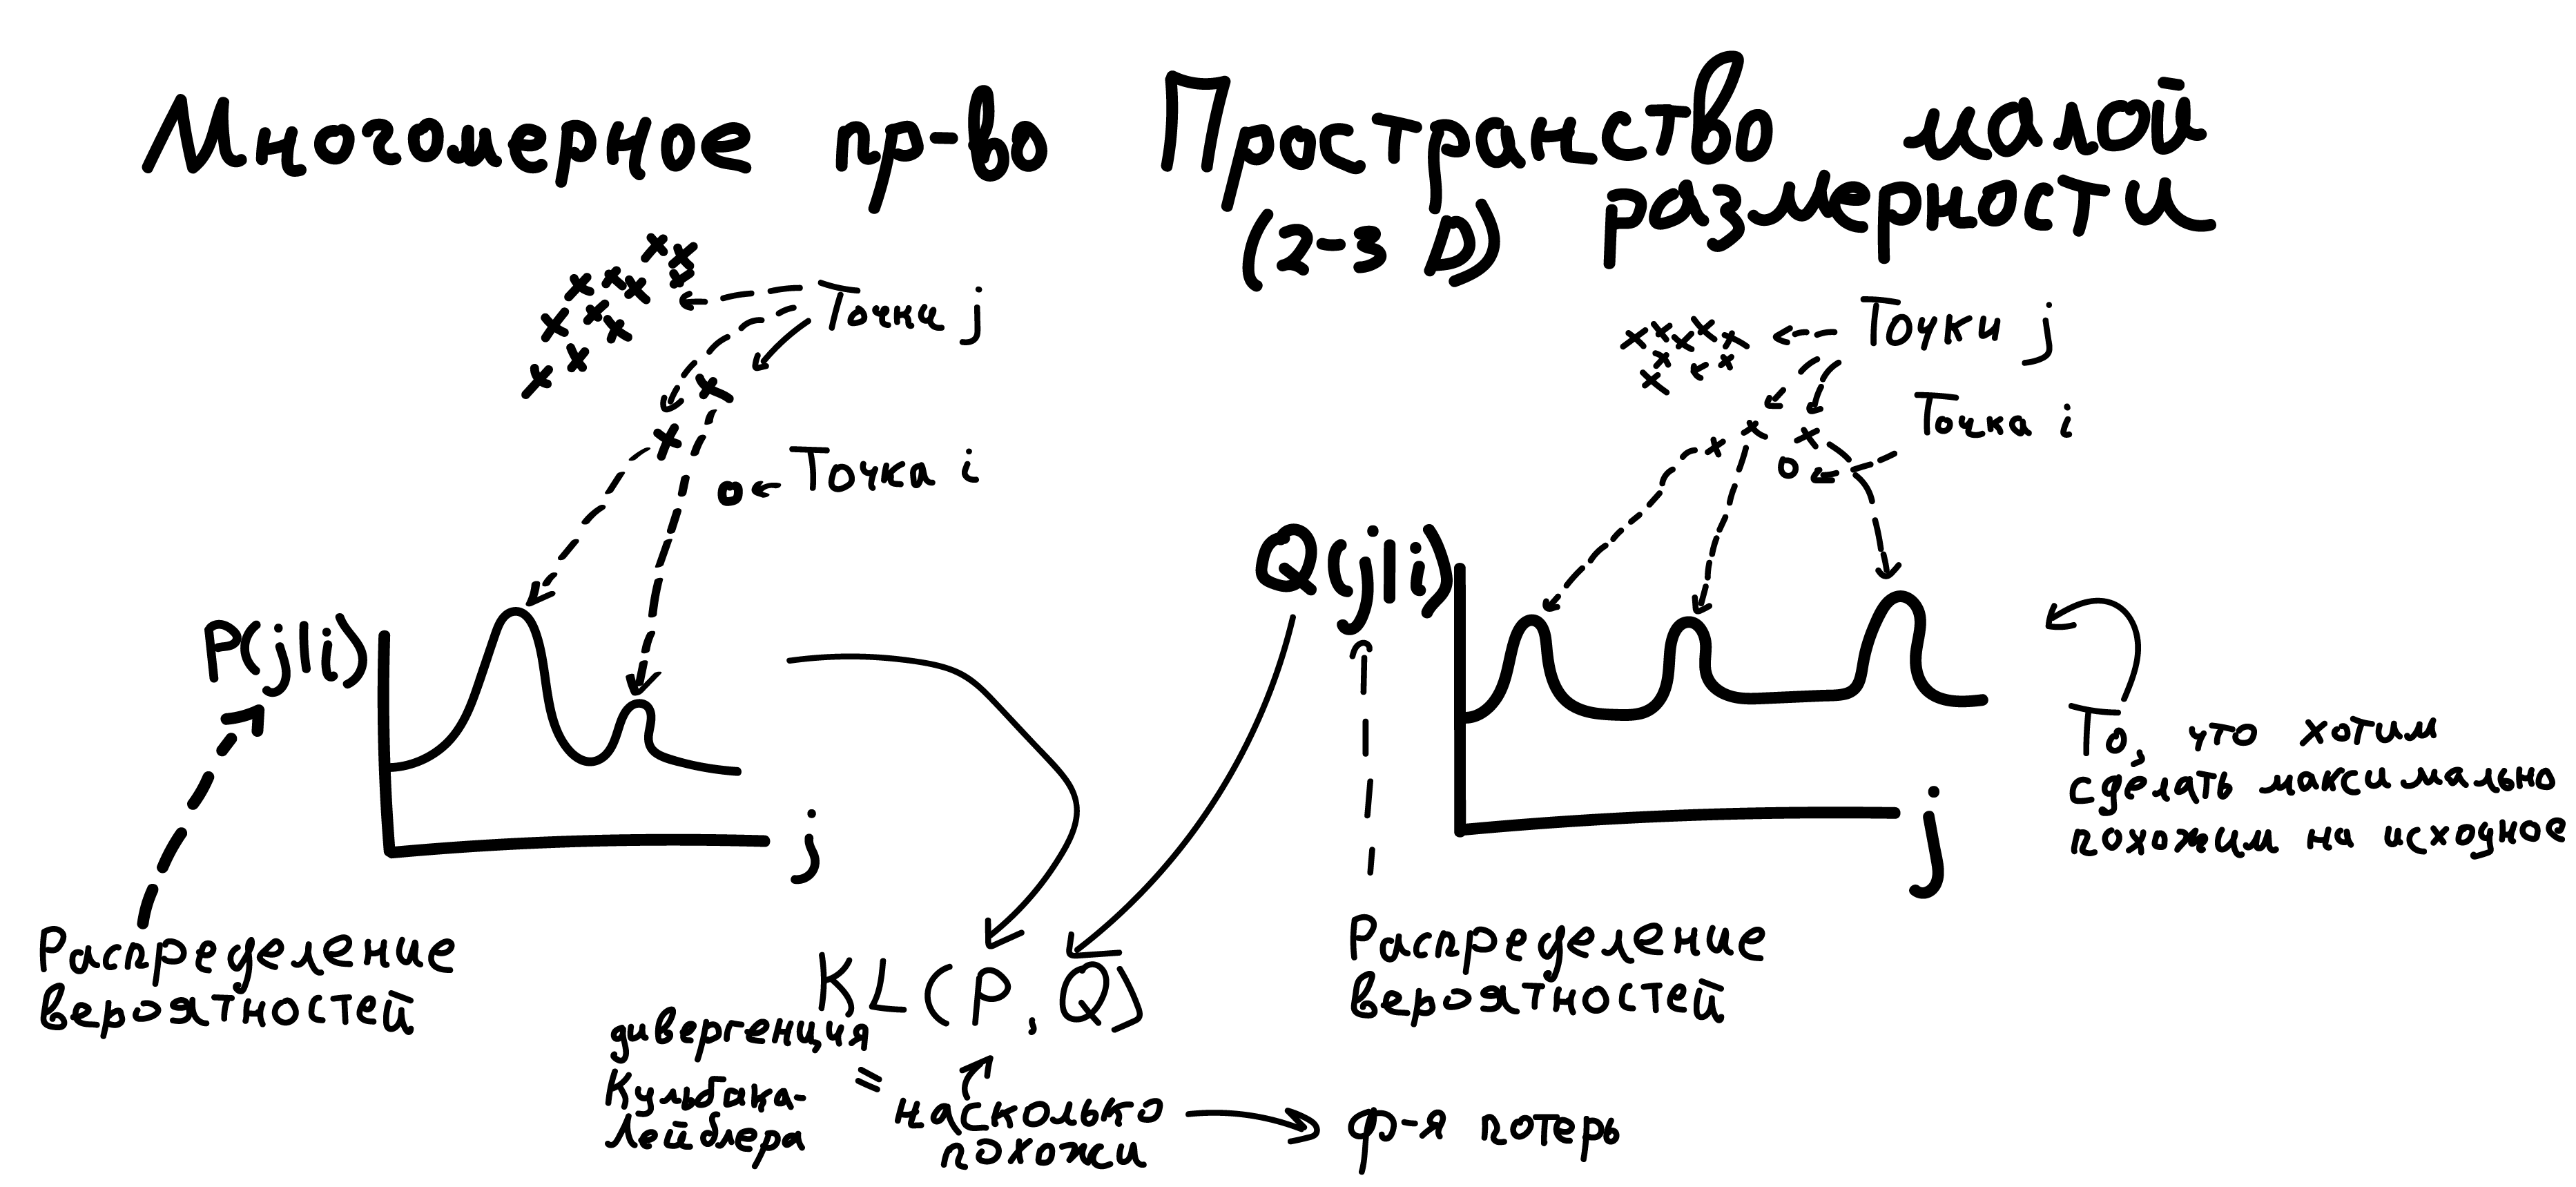

## t-SNE

Точки в новом пространстве получаются слишком сгруппированными, хотим разредить! Возьмем другое распределение для $q$, например, [t-распределение Стьюдента](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%A1%D1%82%D1%8C%D1%8E%D0%B4%D0%B5%D0%BD%D1%82%D0%B0):

$$q_{ij} = \frac{(1+||y_i-y_j||^2)^{-1}}{\sum_{k}\sum_{l \neq k} (1+||y_k-y_l||^2)^{-1}}$$

Остальное остается как есть!

## Градиентный спуск

Итак, если точки отображения $Y_i$ и $Y_j$ корректно моделируют сходство между исходными точками высокой размерности $X_i$ и $X_j$, то соответствующие условные вероятности $P_{j|i}$ и $Q_{j|i}$ будут эквивалентны. В качестве очевидной оценки качества, с которым $Q_{j|i}$ отражает $P_{j|i}$, используется дивергенция или расстояние Кульбака-Лейблера.

Как в случае SNE так и в t-SNE минимизация суммы расстояний для всех точек отображения происходит при помощи градиентного спуска.

Для SNE функция потерь будет определяться:

$$L = \sum_i KL(P_i||Q_i) = \sum_i\sum_j P_{j|i}log\frac{P_{j|i}}{Q_{j|i}}$$

Градиент которой:

$$\frac{\partial L}{\partial y_i}=2\sum_j (P_{j|i} - Q_{j|i} + P_{i|j} - Q_{i|j}(y_i - y_j))$$

Шаг градиентного спуска:

$$Y(t) = Y(t-1) + \alpha \frac{\partial L}{\partial Y} + \alpha(t) (Y(t-1) - Y(t-2))$$

Для t-SNE функция потерь примет вид:

$$L = \sum_i KL(P_i||Q_i) = \sum_i\sum_j P_{j|i}log\frac{P_{j|i}}{Q_{j|i}}$$

Важно сделать уточнение, что распределение нессиметрично, т.е. $P_{i|j} \neq P_{j|i}$, по этой причине мы делаем его симметричным простым усреднением $P_{i|j} = \frac{P_{i|j} + P_{j|i}}{2n}$

Тогда градиент принимает вид:

$$\frac{\partial L}{\partial y_i} = 4\sum_j (P_{i|j} - Q_{i|j})(y_i - y_j)$$

Что с учетом распределения Стьюдента в $Q_{i|j}$ дает нам градиент:

$$\frac{\partial L}{\partial y_i} = 4\sum_j (P_{i|j} - Q_{i|j})(y_i - y_j)(1 + \|y_i - y_j\|^2)^{-1}$$

Тогда весь алгоритм переписывается в виде:

1. Вычисляем попарное сходство $P_{j|i}$ c перплексией $Perplexity$
2. Установливаем $P_{ij} = \frac{(P_{j|i} + P_{i|j})}{2n}$
3. Инициализируем $Y(0) = {y1, y2, …, yn}$ точками нормального распределения ($\mu$ =0, $\sigma$=1e-4)
4. Итерируемся по всем точкам, вычисляя сходство точек в пространстве отображения $Q_{i|j}$

    Вычисляем их градиент $\frac{\partial L}{\partial Y}$.

    Приближаем $Y(t) = Y(t-1) + \alpha \frac{\partial L}{\partial Y} + \alpha(t)(Y(t-1) - Y(t-2))$
